In [3]:
# ! pip uninstall -y opencv-python
# ! pip uninstall -y opencv-contrib-python
!pip install --upgrade opencv-contrib-python --user

  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import time
from IPython.display import Image
import os
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import time
from IPython.display import Image
import os
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18


def get_image_files(folder_path):
    image_files = []
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']  # Add more extensions if needed

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            _, extension = os.path.splitext(file)
            if extension.lower() in valid_extensions:
                image_files.append(os.path.join(root, file))

    return image_files

def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    else:
        print(f"Folder '{folder_path}' already exists.")

def upscale_image(input_path, output_path, factor = 4, plot = True):
  img = cv2.imread(input_path)
  print("Original image size", img.shape)
  sr = cv2.dnn_superres.DnnSuperResImpl_create()
  sr.readModel(f'./models/ESPCN_x{factor}.pb')

  # Set the model by passing the method and the upsampling scale factor.
  sr.setModel('espcn', factor)

  # Upscale the input image.
  result_ESPCN = sr.upsample(img)
  print("Upscaled image size", result_ESPCN.shape)
  if plot:
    plt.figure(figsize=[10,10])
    plt.subplot(111); plt.imshow(result_ESPCN[:,:,::-1]);
    plt.show()
  cv2.imwrite(output_path, result_ESPCN)


In [3]:
output_folder = "output"
create_folder_if_not_exists(output_folder)
img_names = get_image_files("input")

Folder 'output' already exists.


Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


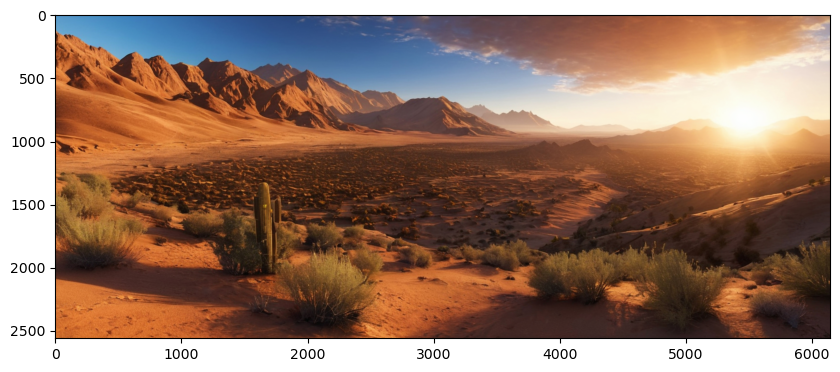

Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


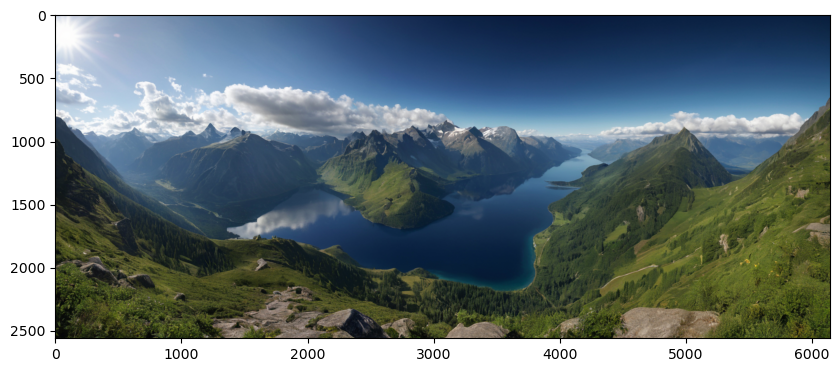

Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


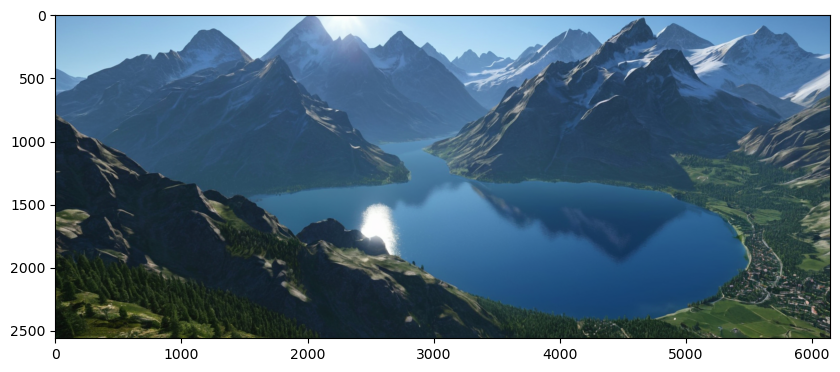

Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


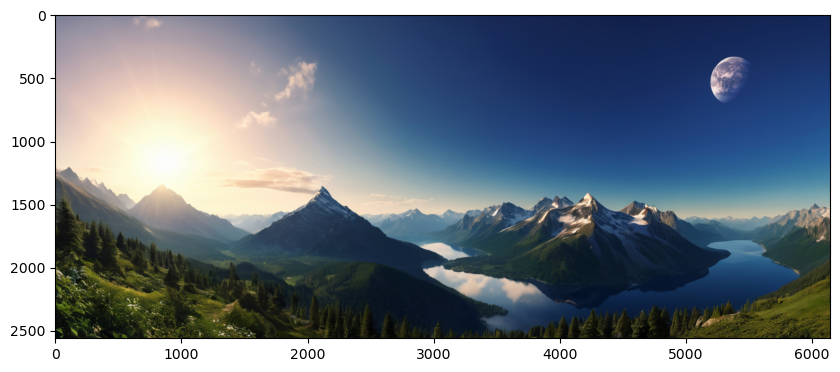

Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


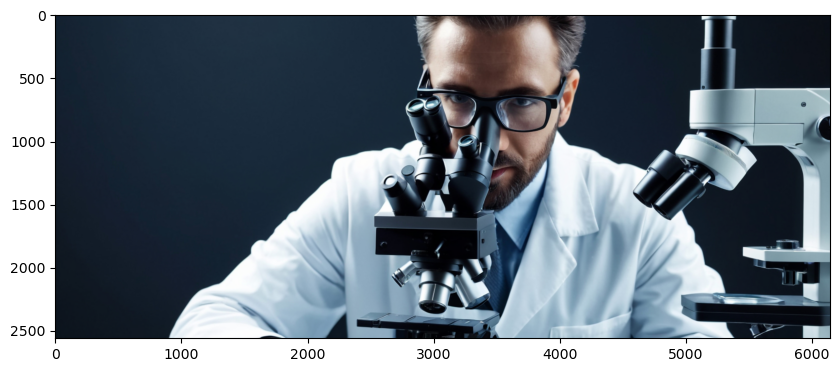

Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


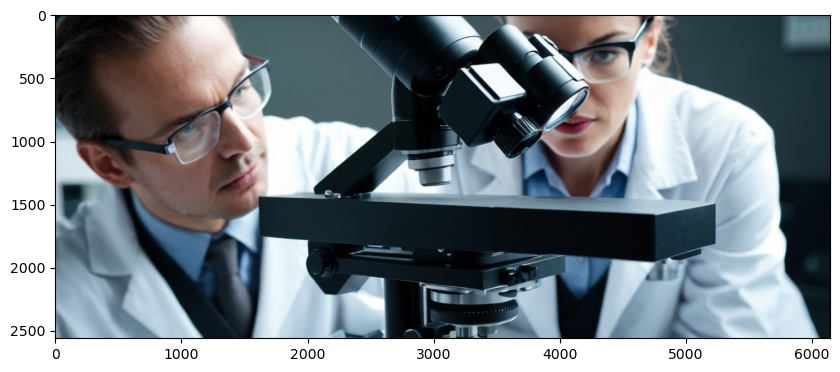

Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


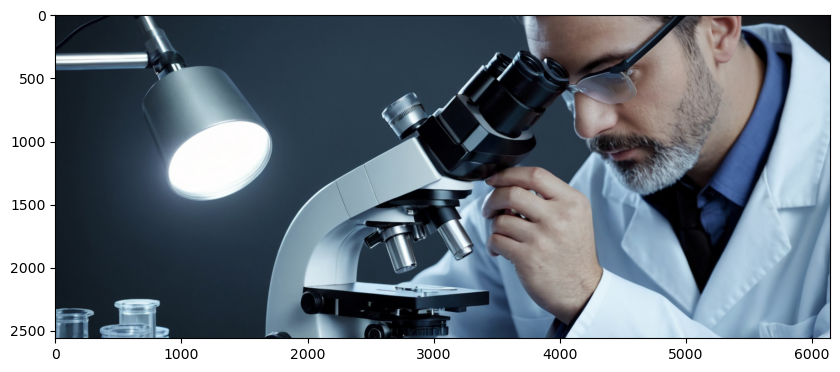

Original image size (640, 1536, 3)
Upscaled image size (2560, 6144, 3)


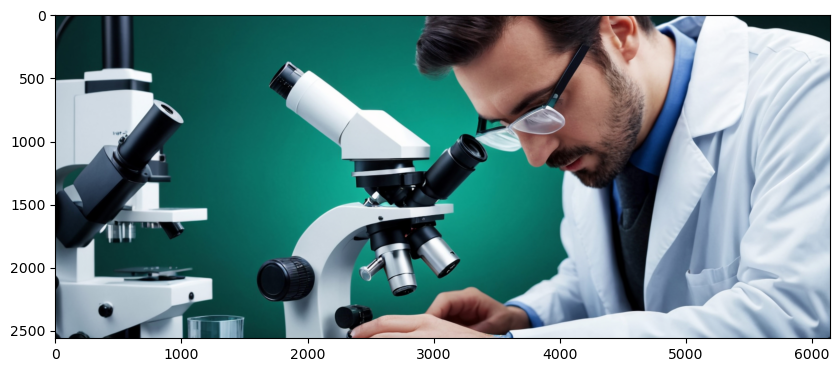

In [4]:
for i, img_name in enumerate(img_names):
  output_path = f"{output_folder}/{i}.png"
  upscale_image(img_name, output_path, factor = 4, plot = True)

In [6]:
import cv2
print(cv2.__version__)

4.9.0
